## Load Data

In [1]:
!pip install python-dateutil
!pip install ipympl

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple/


In [9]:
import pandas as pd
import os, glob
import numpy as np
%matplotlib widget
import matplotlib.pyplot as plt
import datetime as date
import dateutil
import random


random.seed(123123123)

folder = "DATA\csv_automated"
path = os.path.join(folder, "*.csv")
all_CSVs = glob.glob(path)
#print(path)
#print(all_CSVs)
#load all dfs an merge to one

def load_df():
    df_meta = []
    all_channel_names = []
    df_meta = pd.DataFrame(df_meta)
    for csv in all_CSVs: 
        filename = os.path.basename(csv)
        if filename[-13:] == "automated.csv":
            channelName = filename.replace(filename[-14:], "")
            df = pd.read_csv(csv)
            df["Channel"]= channelName
            index = [i for i in range(len(df))]
            df.set_index([index, 'Channel'], inplace= True)
            frames = [df_meta, df]
            df_meta = pd.concat(frames)
            if channelName not in all_channel_names:
                all_channel_names.append(channelName)
    return df_meta, all_channel_names
[df_meta, all_channel_names] = load_df()


#create unique colors
colors=[]
for c in all_channel_names:
    color = []
    for i in range(3):
        x = round(random.uniform(0, 1),2)
        color.append(x)
    colors.append(color)


Wahrheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Wahrheit verpflichtet"]
Schöpfer = df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
Alles = df_meta.loc[df_meta.index.get_level_values("Channel") == "ALLESUNDNICHTS"]
Drachentöter = df_meta.loc[df_meta.index.get_level_values("Channel") == "DRACHENTÖTER TV"]
Freiheit = df_meta.loc[df_meta.index.get_level_values("Channel") == "Der Weg in deine Freiheit"]
Rettung = df_meta.loc[df_meta.index.get_level_values("Channel") == 'Rettung der Menschheit TV']
UBC = df_meta.loc[df_meta.index.get_level_values("Channel") == 'UBC TV']
VeitClub = df_meta.loc[df_meta.index.get_level_values("Channel") == 'VEIT CLUB']
df_collection = [Wahrheit, Schöpfer, Alles, Drachentöter, Freiheit, Rettung, UBC, VeitClub]


## UTILS

In [3]:
#get only one channel
df_meta.loc[df_meta.index.get_level_values("Channel") == "Schöpferwissen TV"]
#print(df_meta.loc["title", "Chronische Dummheit - Die Lösung für die Genesung"])


,,publish_date,id,title,description,keywords,length,views,age_restricted,yt_caption_info,yt_caption_tracks,vid_info,Unnamed: 0
,Channel,,,,,,,,,,,,


## Compare Channels Time

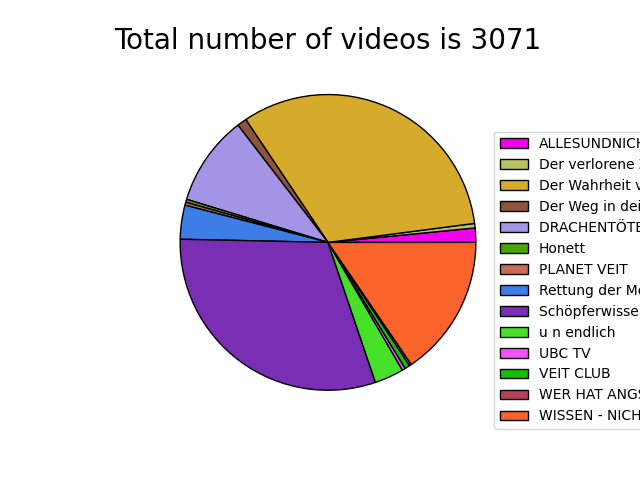

In [13]:
#toDO Legende lesbar machen
Title = "Total number of videos is "+ str(len(df_meta))               
number_of_vids =[]
for name in all_channel_names:
    number_of_vids.append(len(df_meta.loc[df_meta.index.get_level_values("Channel") == name]));
cumsum = np.cumsum(number_of_vids)
explode = [0.1]*8
              
fi1, ax1 = plt.subplots(1, 1)
#fi1.tight_layout() #tight margins
ax1.set_title(Title, loc="center",fontsize=20)
ax1.pie(number_of_vids, radius=1, wedgeprops={ "edgecolor": "black"}, textprops={'fontsize': 8}, colors= colors)
ax1.legend(all_channel_names, bbox_to_anchor=(0.95,0.8), loc="upper left", borderaxespad=0)

plt.show()

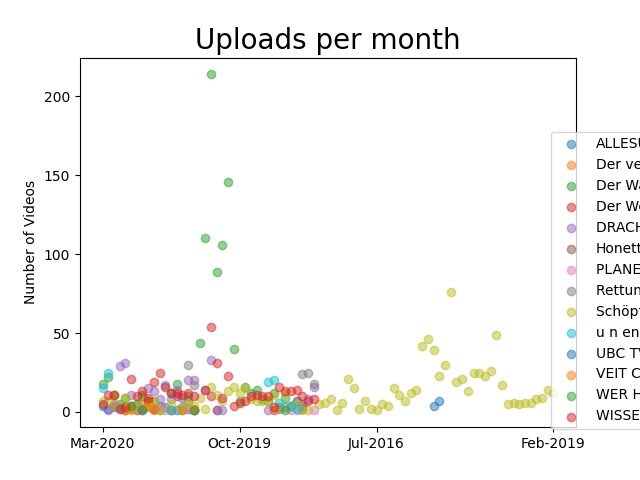

In [77]:
fi2, ax2 = plt.subplots()

#toDo Es muss nochmal sortiert werden
"""series = df.groupby(pd.to_datetime(df["publish_date"])).size()
series = series.dt.strftime('%b-%Y')
print(series)"""
#print(df_meta.loc[df_meta.index.get_level_values("Channel") == channel].sort_values(by= "publish_date"))
#color_count = 0



for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel].sort_values(by= "publish_date")
    series = df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False)["title"].size()
    #print(series)
    ax2.scatter(series.index, series, alpha=0.5)
    color_count = 1 + color_count
"""#Plot with lines : toFDO not sorted
    for channel in all_channel_names[0:3]:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    ax2.plot(df.groupby(pd.to_datetime(df["publish_date"]).dt.strftime('%b-%Y'), sort=False
              )["title"].size(), color=colors[color_count])
    color_count = 1 + color_count
    """
    

Title = "Uploads per month"   
ax2.set_title(Title, loc="center",fontsize=20)
ax2.legend(all_channel_names, bbox_to_anchor=(0.95,0.8), loc="upper left", borderaxespad=0)
#plt.tight_layout()
plt.xticks([0,24,48,79])
plt.ylabel("Number of Videos")
plt.show()

lenght of list of list : 8


<ipython-input-28-69817f3c6410>:46: UserWarning: FixedFormatter should only be used together with FixedLocator
  axx.set_xticklabels(labels)


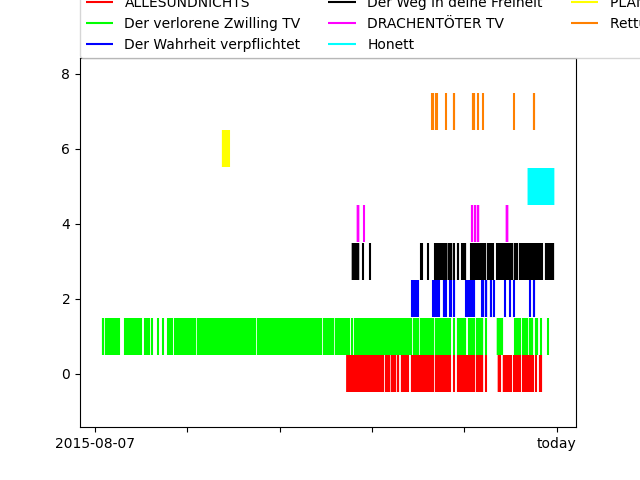

In [28]:
from datetime import datetime
[df, all_channels] = load_df()

list_of_date =[]
list_of_list = []
now = datetime.now()
for df in df_collection:
    for p_date in df["publish_date"]:
        dt = datetime.strptime(p_date, '%Y-%m-%d')
        diff  = (now - dt)

        list_of_date.append(int(diff.days)*-1)
        #print(type(diff.days))
    #list_of_list.append(list_of_date)
    list_of_list.append(list_of_date)
    list_of_date = []

              
colors = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1],
                    [0, 1, 1],
                  [1,1,0],
                  [1,0.5,0]])
    
#display(list_of_list)
# make data:
#date.datetime.strptime(my_date_string, '%b %d %Y %I:%M%p')
#for list in list_of_list:
    #print(list)
    #print("BUB")
x = [2, 4, 6, 8, 10, 12, 14, 16]
D= list_of_list
# plot:
fig, axx = plt.subplots()
print("lenght of list of list : %s" % len(list_of_list))
#colors = ['b','g','r','c', 'm','y', 'k', '']

axx.eventplot(D, orientation="horizontal",  linelengths = 0.98, color = colors )
labels = [item.get_text() for item in axx.get_xticklabels()]
labels[1] = '2015-08-07'
labels[-2] = "today"

axx.set_xticklabels(labels)

axx.legend(all_channels, bbox_to_anchor=(0., 1.0, 1., .10), loc=3,ncol=3, mode="upper left", borderaxespad=0.)
#ax2.legend(all_channel_names, bbox_to_anchor=(0.95,0.8), loc="", borderaxespad=0)
#
#axx.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 3000))
plt.show()

## Video length

In [6]:
df_meta = load_df()
df_drop = df_meta.drop('Der Wahrheit verpflichtet', level=1)
count = 0
list_titles = []
for title in Wahrheit["title"]: 
    #print(title)
    for titleS in df_drop["title"]:
        if title == titleS:
            count += 1
            list_titles.append(title)
            #print("doppletes Video %s" %title)            
display("Show same video titles: %s" %list_titles)

DATA\OLD\ALLESUNDNICHTS_automated.csv
DATA\OLD\Der Wahrheit verpflichtet_automated.csv
DATA\OLD\Der Weg in deine Freiheit_automated.csv
DATA\OLD\DRACHENTÖTER TV_automated.csv
DATA\OLD\Rettung der Menschheit TV_automated.csv
DATA\OLD\UBC TV_automated.csv
DATA\OLD\VEIT CLUB_automated.csv


AttributeError: 'tuple' object has no attribute 'drop'

In [ ]:
counter_len = 0
[df_meta, all_channel_names] = load_df()
for length in Wahrheit["length"]:
    for lengthS in df_drop["length"]:
        if length == lengthS:
            counter_len += 1
print("Videos on other channels with same length: %s" %counter_len)
print("Number of other Videos: %s" % df_drop.shape[0])



print(len_Wahr_h)
duration=0
list_of_length = []
print(all_channel_names)
for channel in all_channel_names:
    df = df_meta.loc[df_meta.index.get_level_values("Channel") == channel]
    secs = int(df["length"].sum(axis = 0, skipna = True))
    hours = secs/360
    days= hours/24
    list_of_length.append(hours)
    duration = duration + hours/24

    
plt.barh(all_channel_names, list_of_length)


duration = duration
title = duration
plt.title("Length of all Videos is %s Days" % round(title))
plt.xlabel("Sum of all video length in hours")
plt.ylabel("")
plt.show()
#print(list_of_length)
#df.groupby(pd.to_datetime(df['Date']).dt.strftime('%b-%Y'), sort=False)['Rep'].size().plot()
#ax2.plot()




## Views over all Views over time views

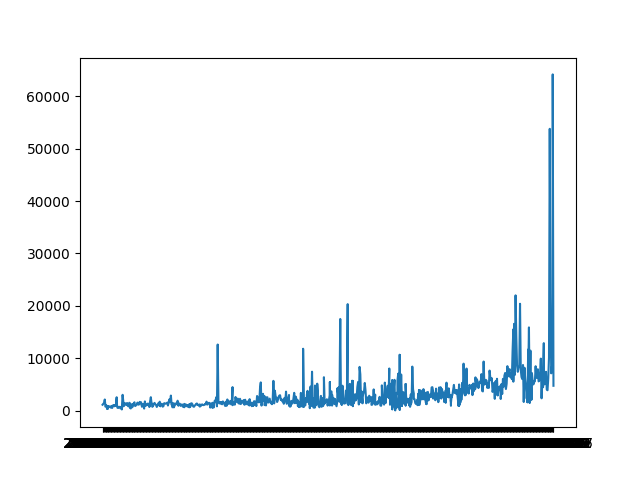

In [29]:
[df, all_channels] = load_df()             
colors = np.array([[1, 0, 0],
                    [0, 1, 0],
                    [0, 0, 1],
                    [0, 0, 0],
                    [1, 0, 1],
                    [0, 1, 1],
                  [1,1,0],
                  [1,0.5,0]])


fig, ax = plt.subplots()
ax.plot(Schöpfer["publish_date"] ,Schöpfer["views"])


#labels = [item.get_text() for item in axx.get_xticklabels()]
#labels[1] = '2015-08-07'
#labels[-2] = "today"
#ax.set_xticklabels(labels)
#ax.legend(all_channels, bbox_to_anchor=(0., 1.0, 1., .10), loc=3,ncol=3, mode="expand", borderaxespad=0.)
#axx.set(xlim=(0, 8), xticks=np.arange(1, 8),
#       ylim=(0, 8), yticks=np.arange(1, 3000))
plt.show()

## Sentiment Analyse

'Vids with highest polarity:'

,id,title,polarity,subjectivity,word_count
117,EkBf_9w9saY,ANGSt,0.375000,0.120000,542.0
333,zb1mIviohfU,"Die Entschlüsslung der Welt, die Keinem gefällt",0.364760,0.055381,1411.0
517,1gH7k0ntTtU,No Name Thomas,0.360722,0.196667,1066.0
18,ygou3LsUrZs,Total Recall,0.343013,0.055671,2831.0
35,6TB8NMnO6iU,SOCIETY,0.340188,0.074614,2094.0


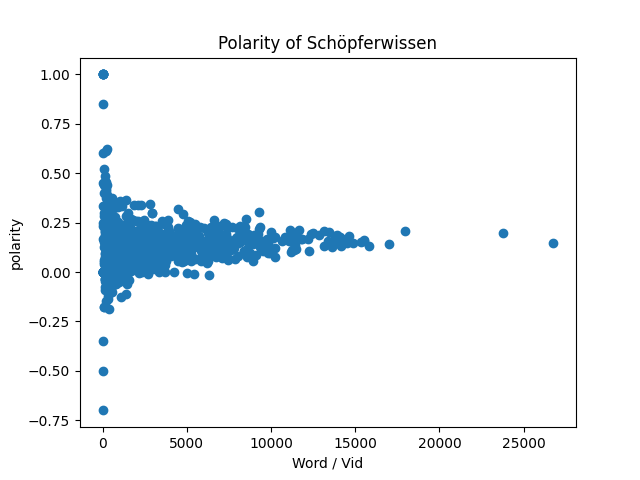

In [75]:
schöpfer_sent = pd.read_csv("Text_Analysis\Schöpferwissen TV_automated.csv")

a = schöpfer_sent[["id","title", "polarity", "subjectivity", "word_count"]]

display("Vids with highest polarity:")
filt = a["word_count"] > 500
display(a[filt].sort_values("polarity", ascending=False).head())

fig, ax = plt.subplots()
ax.scatter(a["word_count"], a["polarity"])
plt.title("Polarity of Schöpferwissen")
plt.xlabel("Word / Vid")
plt.ylabel("polarity")
plt.show()

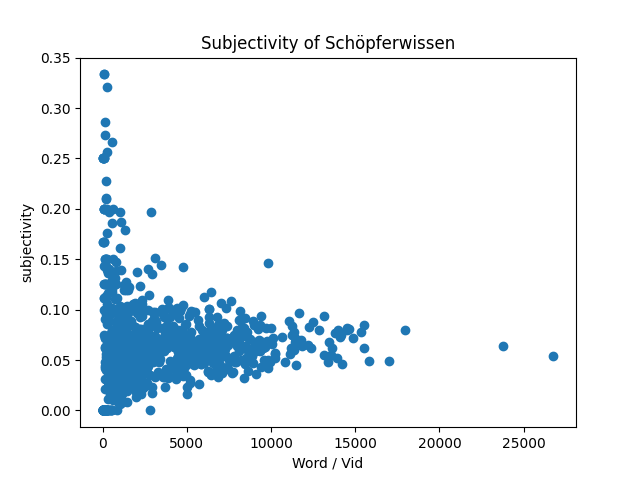

In [73]:
fig, ax = plt.subplots()
ax.scatter(a["word_count"], a["subjectivity"])
plt.title("Subjectivity of Schöpferwissen")
plt.xlabel("Word / Vid")
plt.ylabel("subjectivity")
plt.show()

,id,title,polarity,subjectivity,word_count
403,HsBTUFOP8ww,Das Camp - Die Aktion Rettung Mensch,0.000000,0.333333,64.0
606,wDBv5ybdVLk,Die unglaubliche Wahrheit über Indigo Mensche...,0.400000,0.333333,84.0
608,xoqwXN3BRBk,Auf dem Weg zum Schöpferwissen Teil 4,0.440606,0.321212,263.0
598,D-7KBZs0SKw,Die Pläne der NWO - Eine Erde ohne Menschen,0.142857,0.285714,163.0
555,TGyj8D-nl2E,Herzlich Willkommen im Paradies,0.234848,0.272727,139.0


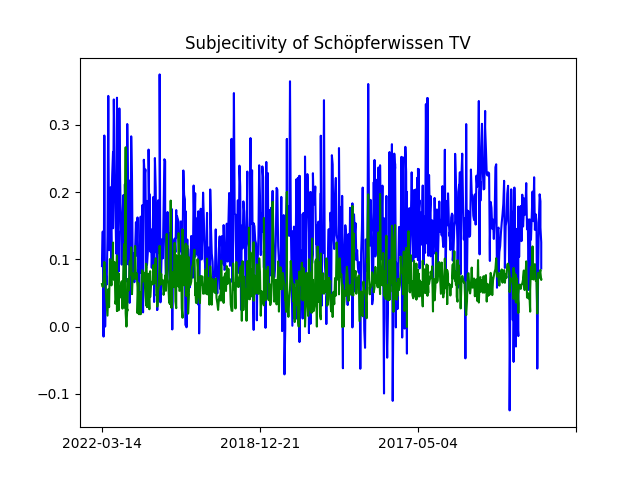

TypeError: '>' not supported between instances of 'str' and 'float'

In [86]:
#filter

#lowest subjectivity
low_sub = a.nlargest(columns= "subjectivity", n=5)

display(low_sub)

fig, ax = plt.subplots()

s= schöpfer_sent["word_count"]>400
schöpf_filt = schöpfer_sent[s]
x = schöpf_filt["publish_date"]
y= schöpf_filt["polarity"]
ax.plot(x,y, color="b")
y= schöpf_filt["subjectivity"]
ax.plot(x, y, color="g")
ax.set_title('Subjecitivity of Schöpferwissen TV')
plt.xticks([0, 200, 400, 600])
plt.show()

h = schöpfer_sent["polarity"]<0.08
high_pol = schöpfer_sent[h]
w = schöpfer_sent["word_count"]>200

display(schöpfer_sent>0.5)

## Topic Modelling

In [3]:
from textblob_de import TextBlobDE
import spacy
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
import os
nltk.download('wordnet')
nlp = spacy.load('de_core_news_md')
snowball = SnowballStemmer("german")

#load stopwords
file_stop = "Text_Analysis\DATA\stopwords-de.txt"
with open (file_stop, "r") as f: 
    stopwords = f.read()
stopset = set(stopwords)


text_folder = r"C:\Users\Stacky\Desktop\HottisExperimentalcode\DATA\Schöpfer_Trans"


bow = []
for path, dirs, files in os.walk(text_folder):
    for file in files: 
        textfile = os.path.join(path, file)
        #load
        with open(textfile, "r") as f:
            text = f.read()
        #tokenization
        blob = TextBlobDE(text)
        sub_stopwords = set(blob.words) - stopset
        #lemmatization
        clean_text = str(sub_stopwords)
        lemmatized = []
        for word in clean_text:
             doc = nlp(word)
             result = ' '.join([x.lemma_ for x in doc]) 
             lemmatized.append(result)
        
        snowball.stem()
        
        break
    break

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stacky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


bub
18988


In [4]:
import pandas as pd

data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False);
data_text = data[['headline_text']]
data_text['index'] = data_text.index
documents = data_text
print(len(documents))
print(documents[:5])

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')
stemmer = SnowballStemmer("english")
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result
doc_sample = documents[documents['index'] == 4310].values[0][0]

print('original document: ')
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')b
print(preprocess(doc_sample))

<ipython-input-4-ed2ab301cce1>:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('abcnews-date-text.csv', error_bad_lines=False);


1226258
                                       headline_text  index
0  aba decides against community broadcasting lic...      0
1     act fire witnesses must be aware of defamation      1
2     a g calls for infrastructure protection summit      2
3           air nz staff in aust strike for pay rise      3
4      air nz strike to affect australian travellers      4
original document: 
['ratepayers', 'group', 'wants', 'compulsory', 'local', 'govt', 'voting']


 tokenized and lemmatized document: 


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stacky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']


In [5]:
processed_docs = documents['headline_text'].map(preprocess)
processed_docs[:10]

0            [decid, communiti, broadcast, licenc]
1                               [wit, awar, defam]
2           [call, infrastructur, protect, summit]
3                      [staff, aust, strike, rise]
4             [strike, affect, australian, travel]
5               [ambiti, olsson, win, tripl, jump]
6           [antic, delight, record, break, barca]
7    [aussi, qualifi, stosur, wast, memphi, match]
8            [aust, address, secur, council, iraq]
9                         [australia, lock, timet]
Name: headline_text, dtype: object

In [7]:
dictionary = gensim.corpora.Dictionary(processed_docs)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 broadcast
1 communiti
2 decid
3 licenc
4 awar
5 defam
6 wit
7 call
8 infrastructur
9 protect
10 summit


In [8]:
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [9]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4310]

[(162, 1), (240, 1), (292, 1), (589, 1), (838, 1), (3570, 1), (3571, 1)]

In [11]:
bow_doc_4310 = bow_corpus[4310]
for i in range(len(bow_doc_4310)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4310[i][0], 
                                               dictionary[bow_doc_4310[i][0]], 
bow_doc_4310[i][1]))

Word 162 ("govt") appears 1 time.
Word 240 ("group") appears 1 time.
Word 292 ("vote") appears 1 time.
Word 589 ("local") appears 1 time.
Word 838 ("want") appears 1 time.
Word 3570 ("compulsori") appears 1 time.
Word 3571 ("ratepay") appears 1 time.


In [13]:
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.5842699484464488),
 (1, 0.38798859072167835),
 (2, 0.5008422243250992),
 (3, 0.5071987254965034)]


In [14]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [15]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.026*"death" + 0.026*"case" + 0.025*"charg" + 0.025*"court" + 0.021*"murder" + 0.021*"polic" + 0.015*"alleg" + 0.013*"trial" + 0.012*"arrest" + 0.012*"face"
Topic: 1 
Words: 0.022*"news" + 0.020*"market" + 0.018*"world" + 0.017*"women" + 0.015*"final" + 0.015*"australian" + 0.015*"island" + 0.012*"return" + 0.011*"street" + 0.010*"fall"
Topic: 2 
Words: 0.065*"coronavirus" + 0.039*"covid" + 0.024*"live" + 0.021*"nation" + 0.020*"coast" + 0.016*"restrict" + 0.014*"water" + 0.012*"gold" + 0.011*"plan" + 0.010*"park"
Topic: 3 
Words: 0.039*"sydney" + 0.025*"polic" + 0.021*"crash" + 0.020*"adelaid" + 0.020*"die" + 0.015*"miss" + 0.012*"break" + 0.012*"drug" + 0.011*"driver" + 0.010*"shoot"
Topic: 4 
Words: 0.038*"year" + 0.031*"melbourn" + 0.022*"open" + 0.021*"canberra" + 0.017*"jail" + 0.015*"work" + 0.014*"high" + 0.014*"life" + 0.013*"offic" + 0.013*"interview"
Topic: 5 
Words: 0.029*"govern" + 0.019*"health" + 0.019*"school" + 0.017*"help" + 0.017*"chang" + 0.015*"fe

In [16]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.010*"australia" + 0.009*"world" + 0.008*"leagu" + 0.007*"lockdown" + 0.007*"final" + 0.007*"open" + 0.007*"hotel" + 0.007*"alan" + 0.006*"violenc" + 0.006*"beat"
Topic: 1 Word: 0.017*"news" + 0.011*"rural" + 0.009*"market" + 0.008*"restrict" + 0.008*"coronavirus" + 0.006*"health" + 0.006*"share" + 0.006*"busi" + 0.006*"financ" + 0.006*"wall"
Topic: 2 Word: 0.012*"court" + 0.012*"murder" + 0.010*"scott" + 0.009*"friday" + 0.008*"michael" + 0.008*"sentenc" + 0.008*"climat" + 0.007*"charg" + 0.007*"trial" + 0.007*"accus"
Topic: 3 Word: 0.011*"interview" + 0.008*"extend" + 0.007*"brief" + 0.007*"coal" + 0.006*"pacif" + 0.006*"say" + 0.006*"spring" + 0.005*"john" + 0.005*"refuge" + 0.005*"asylum"
Topic: 4 Word: 0.014*"drum" + 0.010*"morrison" + 0.010*"south" + 0.009*"tuesday" + 0.008*"sport" + 0.008*"north" + 0.008*"david" + 0.007*"east" + 0.007*"bushfir" + 0.006*"disabl"
Topic: 5 Word: 0.024*"coronavirus" + 0.023*"trump" + 0.020*"covid" + 0.007*"stori" + 0.006*"updat" + 0.

In [17]:
processed_docs[4310]

['ratepay', 'group', 'want', 'compulsori', 'local', 'govt', 'vote']

In [18]:
for index, score in sorted(lda_model[bow_corpus[4310]], key=lambda tup: -1*tup[1]):
    print("\nScore: {}\t \nTopic: {}".format(score, lda_model.print_topic(index, 10)))


Score: 0.41330766677856445	 
Topic: 0.029*"govern" + 0.019*"health" + 0.019*"school" + 0.017*"help" + 0.017*"chang" + 0.015*"feder" + 0.013*"indigen" + 0.012*"state" + 0.012*"communiti" + 0.012*"fund"

Score: 0.3472400903701782	 
Topic: 0.025*"tasmania" + 0.025*"call" + 0.020*"rise" + 0.019*"victorian" + 0.017*"morrison" + 0.017*"tasmanian" + 0.015*"million" + 0.015*"farm" + 0.011*"program" + 0.011*"town"

Score: 0.15192079544067383	 
Topic: 0.070*"australia" + 0.044*"trump" + 0.024*"donald" + 0.017*"elect" + 0.016*"border" + 0.015*"busi" + 0.015*"peopl" + 0.014*"accus" + 0.013*"say" + 0.012*"scott"

Score: 0.012506133876740932	 
Topic: 0.065*"coronavirus" + 0.039*"covid" + 0.024*"live" + 0.021*"nation" + 0.020*"coast" + 0.016*"restrict" + 0.014*"water" + 0.012*"gold" + 0.011*"plan" + 0.010*"park"

Score: 0.01250447891652584	 
Topic: 0.038*"year" + 0.031*"melbourn" + 0.022*"open" + 0.021*"canberra" + 0.017*"jail" + 0.015*"work" + 0.014*"high" + 0.014*"life" + 0.013*"offic" + 0.013*"in

In [19]:
unseen_document = 'How a Pentagon deal became an identity crisis for Google'
bow_vector = dictionary.doc2bow(preprocess(unseen_document))for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

SyntaxError: invalid syntax (<ipython-input-19-3ae840451d2f>, line 2)